In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [2]:
%tensorflow_version 2.x
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
labels = ['0', '1','2','3','4','5']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
!unzip '/content/drive/MyDrive/Training/covid infection percent 499/Train-20211227T124202Z-001.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Classified_Images/5/Image_0329.png  
  inflating: Train/Classified_Images/5/Image_0280.png  
  inflating: Train/Classified_Images/5/Image_0295.png  
  inflating: Train/Classified_Images/3/Image_1983.png  
  inflating: Train/Classified_Images/5/Image_0294.png  
  inflating: Train/Classified_Images/5/Image_0293.png  
  inflating: Train/Classified_Images/5/Image_0288.png  
  inflating: Train/Classified_Images/5/Image_0330.png  
  inflating: Train/Classified_Images/5/Image_0444.png  
  inflating: Train/Classified_Images/5/Image_0443.png  
  inflating: Train/Classified_Images/5/Image_0439.png  
  inflating: Train/Classified_Images/5/Image_0292.png  
  inflating: Train/Classified_Images/5/Image_0337.png  
  inflating: Train/Classified_Images/5/Image_0331.png  
  inflating: Train/Classified_Images/5/Image_0433.png  
  inflating: Train/Classified_Images/5/Image_0283.png  
  inflating: Train/Train/Image_2875.png  
  inflating

In [5]:
import os

In [6]:
len(os.listdir('/content/Train/Classified_Images/0')), \
len(os.listdir('/content/Train/Classified_Images/1')),\
len(os.listdir('/content/Train/Classified_Images/2')),\
len(os.listdir('/content/Train/Classified_Images/3')),\
len(os.listdir('/content/Train/Classified_Images/4')),\
len(os.listdir('/content/Train/Classified_Images/5'))

(735, 1164, 431, 338, 201, 184)

In [7]:
!pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/covid infection percent 499/Dataset1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 3053 files [00:45, 67.73 files/s] 


In [9]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/covid infection percent 499'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/val/ (stored 0%)
  adding: content/splitted_data/val/2/ (stored 0%)
  adding: content/splitted_data/val/2/Image_2769.png (deflated 3%)
  adding: content/splitted_data/val/2/Image_0602.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_0304.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_2812.png (deflated 3%)
  adding: content/splitted_data/val/2/Image_1067.png (deflated 4%)
  adding: content/splitted_data/val/2/Image_1789.png (deflated 3%)
  adding: content/splitted_data/val/2/Image_2326.png (deflated 3%)
  adding: content/splitted_data/val/2/Image_0565.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_1181.png (deflated 3%)
  adding: content/splitted_data/val/2/Image_2069.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_0567.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_1804.png (deflated 2%)
  adding: content/splitted_data/val/2/Image_2925.pn

In [10]:
!cp '/content/drive/MyDrive/Training/covid infection percent 499/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/val/
   creating: content/splitted_data/val/2/
  inflating: content/splitted_data/val/2/Image_2769.png  
  inflating: content/splitted_data/val/2/Image_0602.png  
  inflating: content/splitted_data/val/2/Image_0304.png  
  inflating: content/splitted_data/val/2/Image_2812.png  
  inflating: content/splitted_data/val/2/Image_1067.png  
  inflating: content/splitted_data/val/2/Image_1789.png  
  inflating: content/splitted_data/val/2/Image_2326.png  
  inflating: content/splitted_data/val/2/Image_0565.png  
  inflating: content/splitted_data/val/2/Image_1181.png  
  inflating: content/splitted_data/val/2/Image_2069.png  
  inflating: content/splitted_data/val/2/Image_0567.png  
  inflating: content/splitted_data/val/2/Image_1804.png  
  inflating: content/splitted_data/val/2/Image_2925.png  
  inflating: content/splitted_data/val/2/Image_1839.png  
  inflating: content/splitted_dat

In [11]:
!pip install scikit-plot

In [12]:
train = get_data('/content/splitted_data/train')
#test = get_data('/content/drive/MyDrive/Colab Notebooks/splited_Train_Test/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [13]:
#X=np.asarray(train)
#Y=np.asarray(val)
train.shape

(2133, 2)

Text(0.5, 1.0, '0')

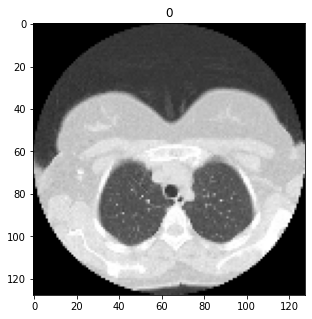

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, '5')

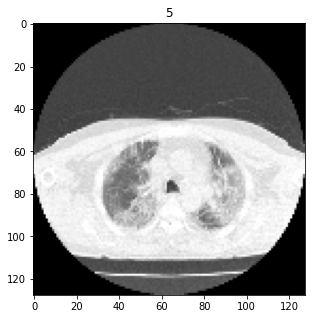

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:

x_train = []
y_train = []
#x_test = []
#y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

#for feature, label in test:
 #   x_test.append(feature)
  #  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
#x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

#x_test.reshape(-1, img_size, img_size, 1)
#y_test = np.array(y_test)

In [17]:
#x_train.shape
#x_train.shape
y_train.shape

(2133,)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [19]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(6, activation="softmax"))

  return model

model=get_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

In [21]:
# Merge inputs and targets
#inputs = np.concatenate((x_train, x_val), axis=0)
#targets = np.concatenate((y_train, y_val), axis=0)

# Define the K-fold Cross Validator
#kfold = KFold(n_splits=10, shuffle=True)

#skf = StratifiedKFold(n_splits=3, shuffle=True)
#skf.get_n_splits(X, Y)
#K.clear_session()
#cuda.select_device(0)
#cuda.close()
from keras import backend as K
import gc

In [22]:
from sklearn.model_selection import KFold

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
34/34 [==============================] - 3s 67ms/step - loss: 1.3919 - accuracy: 0.4299 - val_loss: 1.7277 - val_accuracy: 0.4630
Epoch 2/50
34/34 [==============================] - 2s 62ms/step - loss: 1.3002 - accuracy: 0.4768 - val_loss: 1.6553 - val_accuracy: 0.4517
Epoch 3/50
34/34 [==============================] - 2s 61ms/step - loss: 1.1913 - accuracy: 0.5157 - val_loss: 1.6130 - val_accuracy: 0.4995
Epoch 4/50
34/34 [==============================] - 2s 62ms/step - loss: 1.1190 - accuracy: 0.5293 - val_loss: 1.5202 - val_accuracy: 0.5351
Epoch 5/50
34/34 [==============================] - 2s 62ms/step - loss: 1.0350 - accuracy: 0.5785 - val_loss: 1.4498 - val_accuracy: 0.6382
Epoch 6/50
34/34 [==============================] - 2s 61ms/step - loss: 0.9468 - accuracy: 0.6099 - val_loss: 1.3532 - val_accuracy: 0.6598
Epoch 7/50
34/34 [==============================] - 2s 62

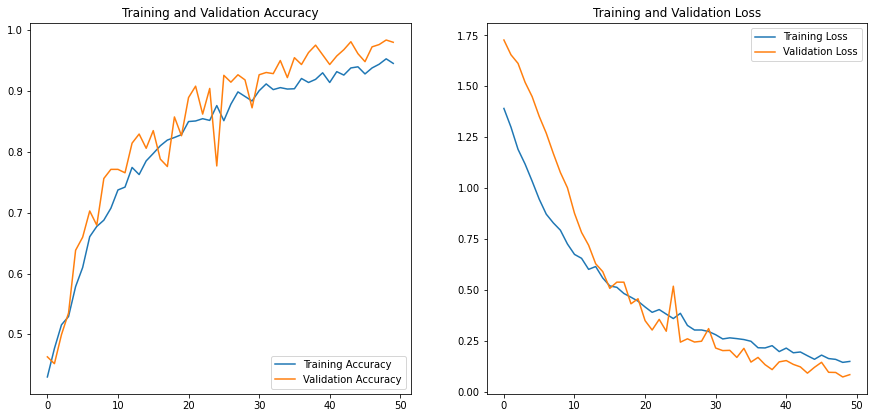

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/50
34/34 [==============================] - 3s 85ms/step - loss: 0.1778 - accuracy: 0.9358 - val_loss: 0.0980 - val_accuracy: 0.9747
Epoch 2/50
34/34 [==============================] - 2s 64ms/step - loss: 0.1513 - accuracy: 0.9494 - val_loss: 0.1055 - val_accuracy: 0.9681
Epoch 3/50
34/34 [==============================] - 2s 64ms/step - loss: 0.1341 - accuracy: 0.9555 - val_loss: 0.0766 - val_accuracy: 0.9887
Epoch 4/50
34/34 [==============================] - 2s 62ms/step - loss: 0.1353 - accuracy: 0.9545 - val_loss: 0.0821 - val_accuracy: 0.9803
Epoch 5/50
34/34 [==============================] - 2s 62ms/step - loss: 0.1295 - accuracy: 0.9517 - val_loss: 0.0741 - val_accuracy: 0.9859
Epoch 6/50
34/34 [==============================] - 2s 62ms/step - loss: 0.1209 - accuracy: 0.9620 - val_loss: 0.0695 - val_accuracy: 0.9831
Epoch 7/50
34/34 [==============================] - 2s 63

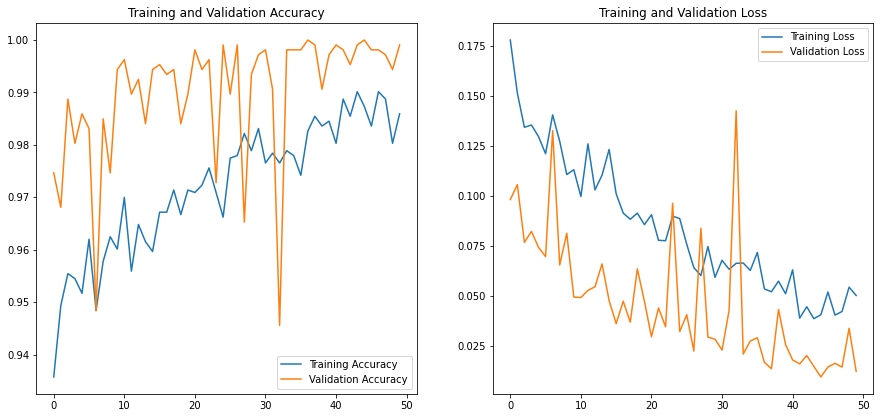

In [24]:
##-----------------sklearn------------##
acc_per_fold=[]
loss_per_fold=[]

X = x_train
y = y_train
kf = KFold(n_splits=2,shuffle=True)
#print(kf.get_n_splits(X))
#print(kf)
#print(X.shape)
#print(y.shape)
#KFold(n_splits=2, random_state=None, shuffle=False)
fold_no = 1
for train_index, test_index in kf.split(X):

  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_kf, X_val_kf = X[train_index], X[test_index]
  y_train_kf, y_val_kf = y[train_index], y[test_index]

  opt = Adam(learning_rate=0.0001)
  model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(x_train,y_train,epochs = 50,batch_size=64 , validation_data = (X_val_kf, y_val_kf))
  

  scores = model.evaluate(X_val_kf,y_val_kf , verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  model.save("model"+str(fold_no)+".h5")

  #loss accuracy graph
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(50)

  plt.figure(figsize=(15, 15))
  plt.subplot(2, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


  #clear session
  tf.keras.backend.clear_session()
  #gc.collect()

  fold_no = fold_no + 1

In [25]:
print(acc_per_fold)

[98.03186655044556, 99.90619421005249]


In [26]:
print(sum(acc_per_fold)/len(acc_per_fold))

98.96903038024902


In [27]:
print(loss_per_fold)

[0.07905270904302597, 0.012163415551185608]


In [28]:
print(sum(loss_per_fold)/len(loss_per_fold))

0.04560806229710579


In [29]:
test_data_dir= '/content/splitted_data/test'
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=5
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=False)

Found 312 images belonging to 6 classes.


In [30]:
model=tf.keras.models.load_model('model1.h5')

In [31]:
actual = test_generator.classes

In [32]:
print(actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [33]:

predict = np.argmax(model.predict(test_generator),axis =1)

In [34]:
print(predict)

[2 2 2 1 0 5 4 4 3 4 4 4 0 0 2 2 2 5 3 0 1 4 2 3 4 5 2 2 2 2 4 1 1 3 2 1 2
 2 4 4 4 1 4 2 2 3 2 3 3 3 4 2 4 2 2 0 4 1 4 4 4 3 1 3 3 3 1 2 2 2 2 3 0 0
 2 2 2 2 1 5 1 1 1 2 5 5 4 3 2 4 2 2 2 5 2 4 5 2 2 4 4 2 4 2 4 4 2 2 4 4 4
 4 4 5 3 2 2 4 2 2 2 5 5 2 2 3 3 2 2 4 1 1 1 2 5 5 5 5 2 4 4 2 3 3 4 4 4 2
 2 3 2 2 4 4 5 5 5 4 3 2 3 2 2 4 4 4 4 4 2 2 2 2 2 2 2 4 2 2 3 4 4 3 1 2 2
 4 2 4 2 2 2 3 4 5 3 5 2 4 4 2 4 5 4 3 3 2 2 2 2 2 2 4 4 4 3 4 5 4 5 3 2 4
 3 2 2 4 3 4 5 4 2 2 2 3 3 2 5 4 4 4 5 5 4 4 4 4 5 5 4 5 4 4 5 5 5 5 5 3 4
 4 4 4 4 5 4 4 4 4 3 3 4 4 4 5 4 5 4 4 4 5 4 4 4 4 5 4 4 4 5 5 5 4 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report


(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f22523148d0>)

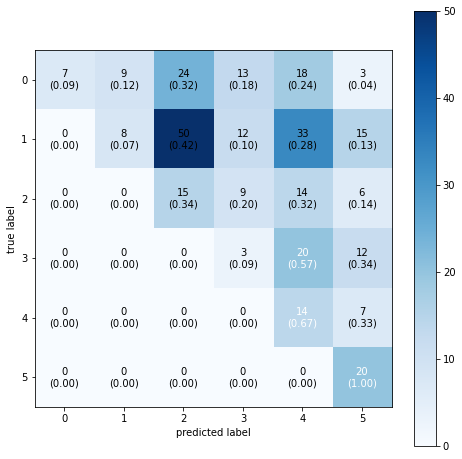

In [36]:
cm=confusion_matrix(actual,predict)
plot_confusion_matrix(cm,figsize=(8,8),
                      colorbar=True,show_normed=True,)